In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X=pd.read_csv("./Training/Logistic_X_Train.csv")
y=pd.read_csv("./Training/Logistic_Y_Train.csv")

In [3]:
X.head()

,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236


In [4]:
X_train,y_train=X.values,y.values

In [12]:
X_train.shape

(2250, 2)

In [53]:
y.head()

,label
0,0
1,0
2,1
3,0
4,1


In [55]:
X_t=pd.read_csv("./Test/Logistic_X_Test.csv")


In [56]:
X_test=X_t.values

## Self Made Neural Networks

In [143]:
class neural_Networks:
    def __init__(self,input_size,layers,output_size):
        
        np.random.seed(0)
        
        model={}
        model["W1"]=np.random.randn(input_size,layers[0])
        model["b1"]=np.zeros((1,layers[0]))
        
        model["W2"]=np.random.randn(layers[0],layers[1])
        model["b2"]=np.zeros((1,layers[1]))
 
        model["W3"]=np.random.randn(layers[1],output_size)
        model["b3"]=np.zeros((1,output_size))
        
        self.model=model
        self.activation_outputs=None
    
    def forward(self,x):
        
        w1,w2,w3=self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3=self.model["b1"],self.model["b2"],self.model["b3"]
        
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3)+b3
        y_= sig(z3)
        
        
        self.activation_outputs=(a1,a2,y_)
        return y_
        
    def backward(self,x,y,lr=0.001):
        
        w1,w2,w3=self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3=self.model["b1"],self.model["b2"],self.model["b3"]
        
        m=x.shape[0]
        a1,a2,y_=self.activation_outputs
        
        delta3=y_- y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)
        
        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)
        
        
        self.model["W1"]-=lr*dw1
        self.model["b1"]-=lr*db1
        
        self.model["W2"]-=lr*dw2
        self.model["b2"]-=lr*db2
        
        self.model["W3"]-=lr*dw3
        self.model["b3"]-=lr*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
        
        
    def summary(self):
        
        w1,w2,w3=self.model["W1"],self.model["W2"],self.model["W3"]
        a1,a2,y_=self.activation_outputs
        
        print("W1 :",w1.shape)
        print("A1 :",a1.shape)
        
        print("W2 :",w2.shape)
        print("A2 :",a2.shape)
        
        print("W3 :",w3.shape)
        print("Y_ :",y_.shape)

In [144]:
def loss(y_oht,p):
    l= -np.mean(y_oht*np.log(p))
    
    return l

def one_hot(y,depth):
    
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    
    return y_oht

In [223]:
def train(x,y,model,epochs,lr,logs=True):
    training_loss=[]
    
    classes = 2
    Y_OHT=one_hot(y,classes)
    
    for ix in range(epochs):
        Y_=model.forward(x)
        l=loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(x,Y_OHT,lr)
        
        if(logs):
            print("Epochs %d Loss %.4f"%(ix,l))
            
    return training_loss

In [224]:
def getAcc(x,y,model):
    outputs=model.predict(x)
    acc=np.sum(outputs==y)/y.shape[0]
    return acc


In [275]:
def sig(x):
    e_pa=1/(1 + np.exp(-x))
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return e_pa

In [276]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [268]:
def ReLU(x):
    return x * (x > 0)

In [269]:
def relu(x):
    if x>0:
        return x
    return 0

In [320]:
model_1=neural_Networks(input_size=2,layers=[16,16],output_size=2)

In [ ]:
l=train(X_train[:2000],y_train.reshape(2250,)[:2000],model_1,200,0.0001)

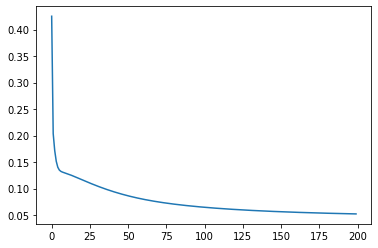

In [322]:
plt.plot(l)

In [323]:
model_1.summary()

W1 : (2, 16)
A1 : (2000, 16)
W2 : (16, 16)
A2 : (2000, 16)
W3 : (16, 2)
Y_ : (2000, 2)


In [324]:
y_test=model_1.predict(X_test)

In [328]:
getAcc(X_train[2000:],y_train.reshape(2250,)[2000:],model_1)

0.968

In [338]:
d={
    "label":y_test

}

In [339]:
data=pd.DataFrame(d,index=None)

In [340]:
data.to_csv("Submit.csv",index=False)

NameError: name 'yt' is not defined

In [311]:
y_train.reshape(2250,)

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

## Ready made Neural Networks

In [312]:
from keras import models
from keras.layers import Dense

In [342]:
model=models.Sequential()

In [343]:
model.add(Dense(16,activation="relu",input_shape=(2,)))

In [344]:
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [345]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [346]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                48        
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [347]:
model.fit(X_train,y_train,epochs=200,batch_size=100,validation_split=0.2)

Epoch 1/200
18/18 [==============================] - 0s 8ms/step - loss: 0.6461 - accuracy: 0.7339 - val_loss: 0.6055 - val_accuracy: 0.8778
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.8606 - val_loss: 0.5510 - val_accuracy: 0.8800
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.8644 - val_loss: 0.5012 - val_accuracy: 0.8822
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.8606 - val_loss: 0.4556 - val_accuracy: 0.8756
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8600 - val_loss: 0.4141 - val_accuracy: 0.8778
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8611 - val_loss: 0.3790 - val_accuracy: 0.8756
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8617 - val_loss: 0.3488 - val_accuracy: 0.8778
Epoch 8/200
1

In [142]:
model.f

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
